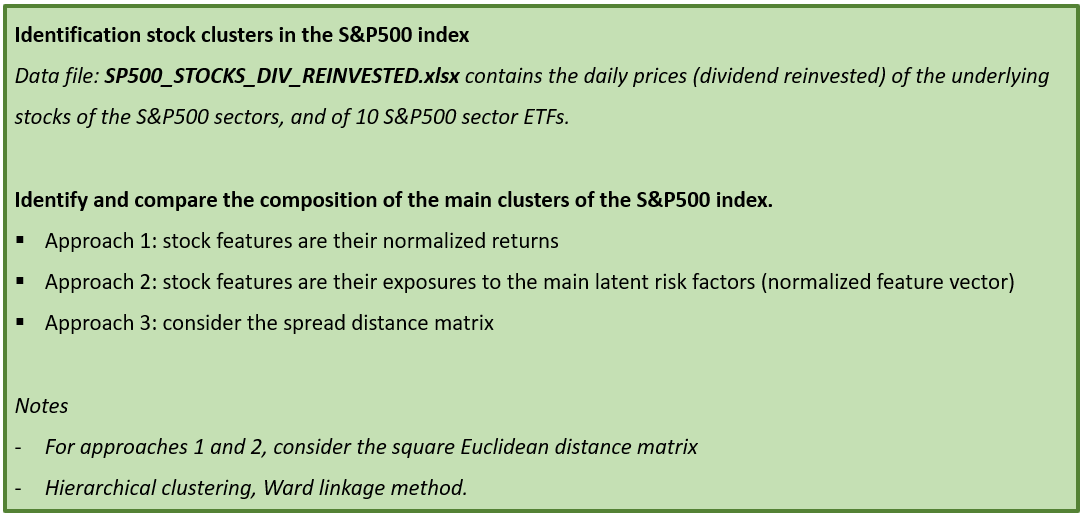

Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing
from matplotlib import pyplot as plt
from statsmodels.multivariate.pca import PCA as PCA
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import calinski_harabasz_score as score_ch
from sklearn.metrics import davies_bouldin_score as score_db
from sklearn.metrics import silhouette_score as score_sc
from GapStat import gap_stat

Import data

In [2]:
for i in range(10):
    if i==0:
        ALL_STOCKS=pd.read_excel('SP500_STOCKS_DIV_REINVESTED.xlsx', i+2, usecols='B:ZZ')
        NAMES=list(ALL_STOCKS)
        ALL_STOCKS=np.array(ALL_STOCKS)
        SECTOR_ID=np.zeros((ALL_STOCKS.shape[1]))
    else:
        load=pd.read_excel('SP500_STOCKS_DIV_REINVESTED.xlsx', i+2, usecols='B:ZZ')
        NAMES=NAMES+list(load)
        ALL_STOCKS=np.append(ALL_STOCKS,np.array(load),axis=1)
        SECTOR_ID=np.append(SECTOR_ID,np.zeros((np.array(load).shape[1]))+i)
SP500=np.array(pd.read_excel('SP500_STOCKS_DIV_REINVESTED.xlsx', 'MarketIndex', usecols='B'))
SECTOR_LABELS=['Communication services', 'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 'Healthcare', 'Industrials','Information Technology', 'Materials', 'Utilities' ]

Missing data

In [3]:
select=(1-np.sum(np.isnan(ALL_STOCKS),axis=0)==1)
STOCKS_SELECT=ALL_STOCKS[:,select]
select_id=np.arange(0,ALL_STOCKS.shape[1],1)[select]
NAMES_SELECT=[NAMES[i] for i in select_id]
SECTOR_ID_SELECT=SECTOR_ID[select]
n_stocks=STOCKS_SELECT.shape[1]

Return computation

In [4]:
RETURNS=STOCKS_SELECT[1:,:]/STOCKS_SELECT[:-1,:]-1
RETURNS_NORM=preprocessing.scale(RETURNS)
RETURNS_SP500=SP500[1:,:]/SP500[:-1,:]-1
n_obs=len(RETURNS)

- Distance matrix

In [5]:
DIST_1=pdist(RETURNS_NORM.T,'euclidean')

- Clustering

In [6]:
clustering_1 = linkage(DIST_1,method='ward')

- Gap statistic

[]

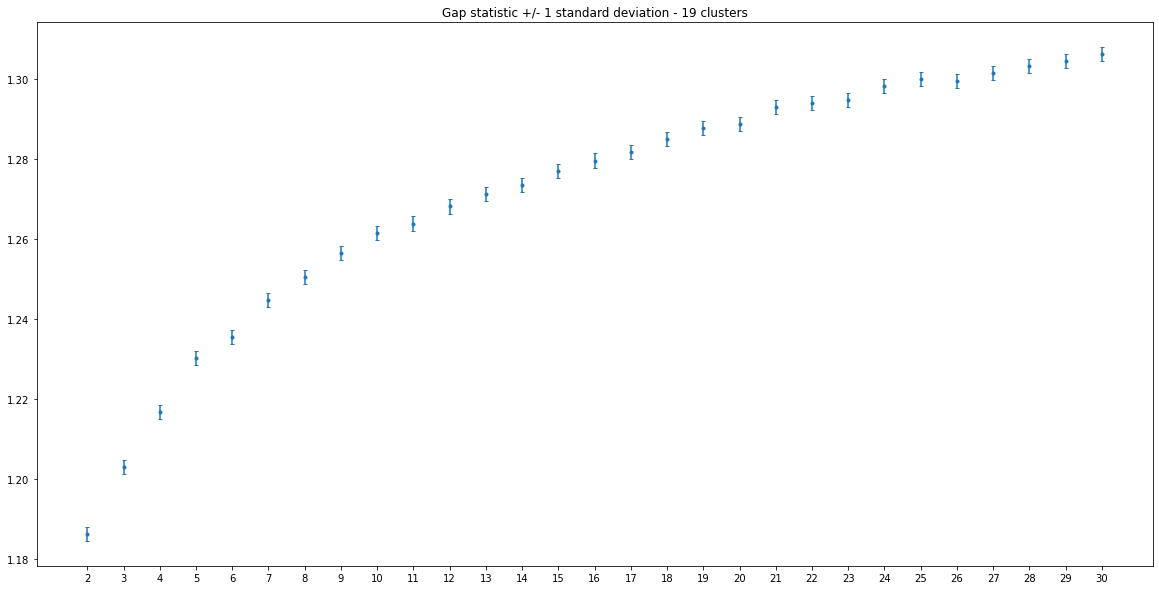

In [7]:
N_CLUSTER=0
cmax=30
GAP_OUT=np.zeros((cmax-1,2))
for i in np.arange(2,cmax+1,1):
    clusters=fcluster(clustering_1,i,criterion='maxclust')
    out=gap_stat('euclidean', 'ward', RETURNS_NORM, DIST_1, clusters, 10)
    GAP_OUT[i-2,:]=[out[0],out[1]]
std_GAP=np.mean(out[1])
for i in np.arange(2,cmax,1):
    if GAP_OUT[i-2,0]>(GAP_OUT[i-1,0]-GAP_OUT[i-1,1]):
        N_CLUSTER=i
        break

plt.figure(figsize=(20, 10))
plt.errorbar(np.arange(2,cmax+1,1), GAP_OUT[:,0], GAP_OUT[i-1,1], capsize=2, fmt='.')
plt.title("Gap statistic +/- 1 standard deviation - %i clusters" %N_CLUSTER)
plt.xticks(np.arange(2,cmax+1,1))
plt.plot()

- Dendogram

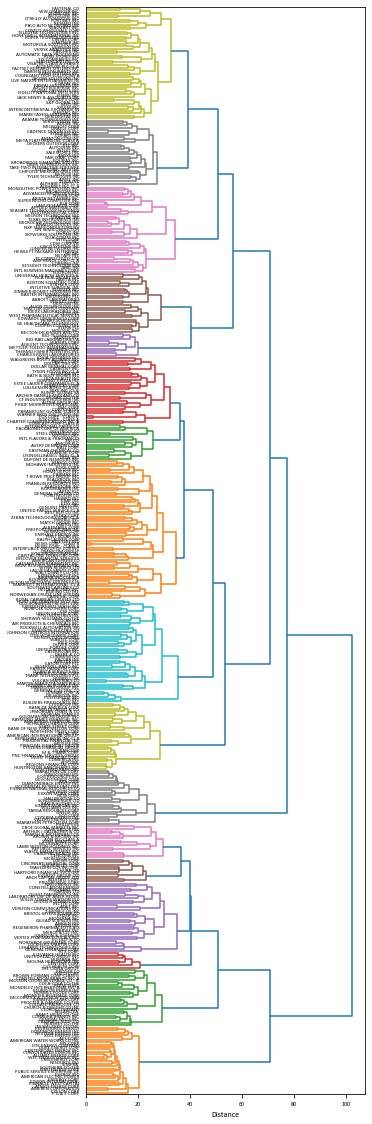

In [8]:
plt.figure(figsize=(5, 20))
csfont = {'fontname':'Calibri', 'fontsize' : '10'}
csfont2 = {'fontname':'Calibri', 'fontsize' : '8'}
csfont3 = {'fontname':'Calibri', 'fontsize' : '6'}
plt.xlabel('Distance',**csfont2)
plt.xticks(**csfont3)
plt.yticks(**csfont3)
dendrogram(clustering_1,color_threshold=36,truncate_mode='level',orientation='right',leaf_font_size=5,labels=NAMES_SELECT)
plt.savefig('books_read.jpeg',bbox_inches='tight', dpi=300)
plt.show()

- Number of clusters

In [9]:
for i in np.arange(2,20,1):
    clusters=fcluster(clustering_1,i,criterion='maxclust')
    sc1=score_db(RETURNS_NORM.T,clusters)
    sc2=score_ch(RETURNS_NORM.T,clusters)
    sc3=score_sc(RETURNS_NORM.T,clusters)
    print(sc1, sc2, sc3)

3.5640408681500437 26.282395131371036 0.07219627015682055
3.0008544350913087 21.29798889973152 0.05582962253711297
2.8575106459402515 19.017148920560665 0.05029218701092022
3.498325416237556 18.077358671982825 0.04409141468789166
3.3011934637224023 16.48934325358368 0.0499539861362997
3.3904910639280823 15.298647497646858 0.033587176358277
3.349108437421748 14.361502845611426 0.03482926823667331
3.3159771745171955 13.686122407688933 0.03903548985293762
3.335813512357329 13.107064624094726 0.041978201832314
3.2291858357260974 12.387651955711682 0.045238282391589134
3.133226373659421 11.80633681526821 0.047292581606263116
3.1532289604523975 11.324131376823644 0.05017777008708029
3.2751158266393534 10.897588075869292 0.051934371466324056
3.405078321837363 10.50700307055178 0.05430028047046399
3.321394304066998 10.155120692331726 0.05563367879918475
3.2406503926395005 9.845115606619446 0.058309077728336434
3.1473923590791513 9.555931130949654 0.056370830264829225
3.058646527879296 9.301065

In [10]:
for i in range(10):
    clusters=fcluster(clustering_1,i,criterion='maxclust')
    out=gap_stat('sqeuclidean', 'ward', RETURNS_NORM, DIST_1, clusters, 100)
    print(out[0],out[1])

5.341189842018316 0.0032939453143440004
5.340826175681347 0.0029276638180705003
5.364578174062627 0.003396039850830347
5.377937230208467 0.0038576468071733483
5.390514660129821 0.0031874281066565755
5.400957534156399 0.003051151367848758
5.406264098791537 0.0031888537256756556
5.4138838152995294 0.002978134647476588
5.417575804901878 0.00311848800896277
5.421972568346796 0.003055661342826294


- PCA on normalized data

In [11]:
out_pca=PCA(RETURNS_NORM)

- IC Criteria

In [12]:
N_FACTORS=min((out_pca.ic[:50,:]).argmin(axis=0))+1
FACTORS=preprocessing.scale((out_pca.factors)[:,0:N_FACTORS])
print('Number of principal components: ', N_FACTORS)

Number of principal components:  5


- Estimation of factor exposures as features

In [13]:
FEATURES=np.zeros((n_stocks,N_FACTORS))
for i in range(n_stocks):
    model=sm.OLS(RETURNS[:,i],sm.add_constant(FACTORS))
    out_model=model.fit()
    FEATURES[i,:]=out_model.params[1:]
FEATURES=preprocessing.scale(FEATURES)

- Distance matrix

In [14]:
DIST_2=pdist(FEATURES,'euclidean')

- Clustering

In [15]:
clustering_2 = linkage(DIST_2,method='ward')

- Gap statistic

[]

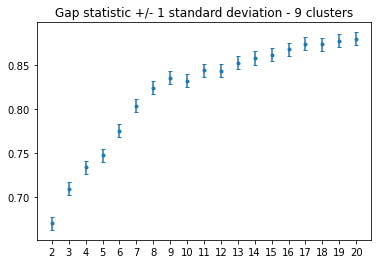

In [16]:
cmax=20
GAP_OUT=np.zeros((cmax-1,2))
for i in np.arange(2,cmax+1,1):
    clusters=fcluster(clustering_2,i,criterion='maxclust')
    out=gap_stat('euclidean', 'ward', FEATURES.T, DIST_2, clusters, 20)
    GAP_OUT[i-2,:]=[out[0],out[1]]
std_GAP=np.mean(out[1])
for i in np.arange(2,cmax+1,1):
    if GAP_OUT[i-2,0]>(GAP_OUT[i-1,0]-std_GAP):
        N_CLUSTER=i
        break

        plt.figure()
plt.errorbar(np.arange(2,cmax+1,1), GAP_OUT[:,0], std_GAP, capsize=2, fmt='.')
plt.title("Gap statistic +/- 1 standard deviation - %i clusters" %N_CLUSTER)
plt.xticks(np.arange(2,cmax+1,1))
plt.plot()

- Dendogram

In [ ]:
plt.figure(figsize=(10, 20))
csfont = {'fontname':'Calibri', 'fontsize' : '10'}
csfont2 = {'fontname':'Calibri', 'fontsize' : '8'}
csfont3 = {'fontname':'Calibri', 'fontsize' : '6'}
plt.xlabel('Distance',**csfont2)
plt.xticks(**csfont3)
plt.yticks(**csfont3)
dendrogram(clustering_2,color_threshold=11,truncate_mode='level',orientation='right',leaf_font_size=5,labels=NAMES_SELECT)
plt.savefig('books_read.jpeg',bbox_inches='tight', dpi=300)
plt.show()

- Other cluster diagnostics

In [ ]:
for i in np.arange(2,20,1):
    clusters=fcluster(clustering_2,i,criterion='maxclust')
    sc1=score_db(FEATURES,clusters)
    sc2=score_ch(FEATURES,clusters)
    sc3=score_sc(FEATURES,clusters)
    print(sc1, sc2, sc3)